In [ ]:
pip install numpy matplotlib opencv-python scikit-learn


In [1]:
# ✅ STEP 1: Import required libraries
import os
import zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# ✅ STEP 2: Unzip the dataset (if not yet unzipped)
# Make sure dogs-vs-cats.zip is in the same folder as this notebook
with zipfile.ZipFile("dogs-vs-cats.zip", 'r') as zip_ref:
    zip_ref.extractall(".")
    
print("✅ Dataset unzipped.")


✅ Dataset unzipped.


In [3]:
# ✅ STEP 3: Prepare the data
# check folder structure after unzipping; usually it's train/dog, train/cat
data_dir = "train"
categories = ["dog", "cat"]

X = []
y = []

IMG_SIZE = 64  # you can lower this to 32 to save RAM

for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)
    # limit number of images to keep things light
    for img_file in os.listdir(path)[:1000]:
        try:
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img_flat = img.flatten()
            X.append(img_flat)
            y.append(label)
        except:
            pass

X = np.array(X)
y = np.array(y)

print(f"✅ Processed {len(X)} images with shape {X.shape}")


✅ Processed 2000 images with shape (2000, 12288)


In [5]:
# ✅ STEP 4: Split data for training/testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data split complete.")


✅ Data split complete.


In [7]:
# ✅ STEP 5: Train SVM model
svm = SVC(kernel='linear', random_state=42)
print("⏳ Training SVM (this can take a few minutes)...")
svm.fit(X_train, y_train)
print("✅ SVM training complete.")


⏳ Training SVM (this can take a few minutes)...
✅ SVM training complete.


In [11]:
# ✅ STEP 6: Evaluate the model
y_pred = svm.predict(X_test)

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred, target_names=categories))

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")



✅ Classification Report:
              precision    recall  f1-score   support

         dog       0.58      0.47      0.52       199
         cat       0.56      0.67      0.61       201

    accuracy                           0.57       400
   macro avg       0.57      0.57      0.57       400
weighted avg       0.57      0.57      0.57       400

✅ Accuracy: 57.0 %


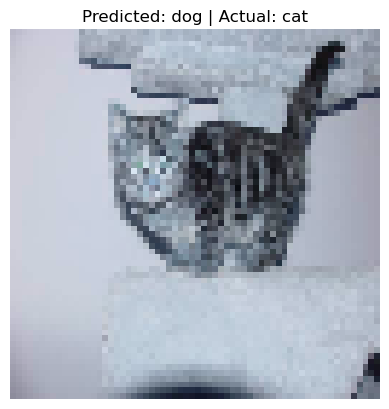

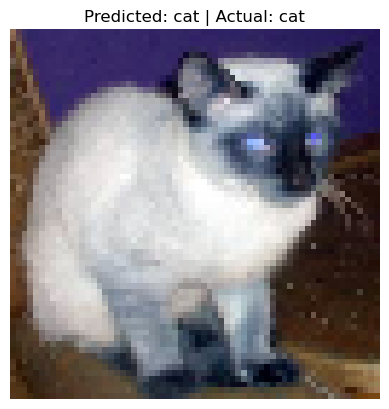

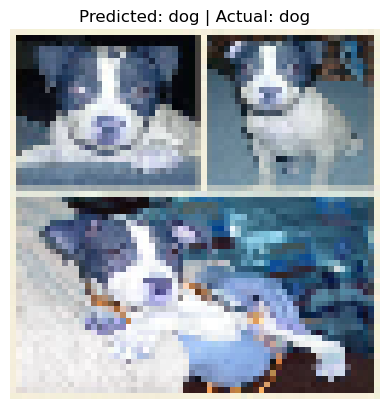

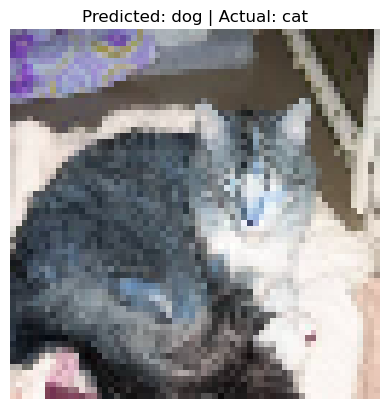

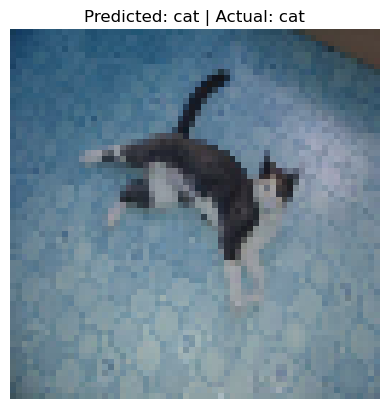

In [13]:
# ✅ STEP 7: Show sample predictions
for i in range(5):
    idx = np.random.randint(len(X_test))
    img = X_test[idx].reshape(IMG_SIZE, IMG_SIZE, 3)
    plt.imshow(img.astype(np.uint8))
    plt.title(f"Predicted: {categories[y_pred[idx]]} | Actual: {categories[y_test[idx]]}")
    plt.axis("off")
    plt.show()
